In [1]:
from funcs import run_net, all_neurons_ts, rm, receptive_fields_of_ind_layers,pca_receptive_fields_of_ind_layers,nmf_receptive_fields_of_ind_layers
import numpy as np

# Initialization

In [2]:
activations,q_func,im_arr=run_net('space invaders')

[TESTING]
[TESTING] Total Reward: 23.0, Unclipped Reward: 325.0


In [3]:
ts_total=all_neurons_ts([1,2,3],activations)
ts_l1=all_neurons_ts([1],activations)
ts_l2=all_neurons_ts([2],activations)
ts_l3=all_neurons_ts([3],activations)

torch.Size([1, 4, 84, 84])
torch.Size([1, 32, 20, 20])
torch.Size([1, 64, 9, 9])
torch.Size([1, 4, 84, 84])
torch.Size([1, 32, 20, 20])
torch.Size([1, 64, 9, 9])


In [13]:
np.save('space-invaders_ts_total.npy',ts_total)
np.save('space-invaders_ts_l1.npy',ts_l1)
np.save('space-invaders_ts_l2.npy',ts_l2)
np.save('space-invaders_ts_l3.npy',ts_l3)
np.save('space-invaders_im_arr.npy',im_arr)

In [2]:
ts_l1=np.load('space-invaders_ts_l1.npy')
ts_l2=np.load('space-invaders_ts_l2.npy')
ts_l3=np.load('space-invaders_ts_l3.npy')
im_arr=np.load('space-invaders_im_arr.npy')

In [19]:
print(ts_l1.shape)

(28224, 993)


# Rastermap

nmin 200
0.1410379409790039
12.375346422195435
12.955168962478638
13.195404767990112
(98, 100)
(130,)
1.0
time; iteration;  explained PC variance
1.02s     0        0.4963      2
5.25s    10        0.5343      4
9.22s    20        0.5781      8
12.60s    30        0.6365      18
16.97s    40        0.6618      28
20.93s    50        0.6736      38
24.84s    60        0.6808      48
28.97s    70        0.6898      58
33.17s    80        0.6962      68
37.09s    90        0.6997      78
40.85s    100        0.7030      88
44.70s    110        0.7090      98
48.77s    120        0.7103      98
53.14s   final      0.7104
53.42s upsampled    0.7104


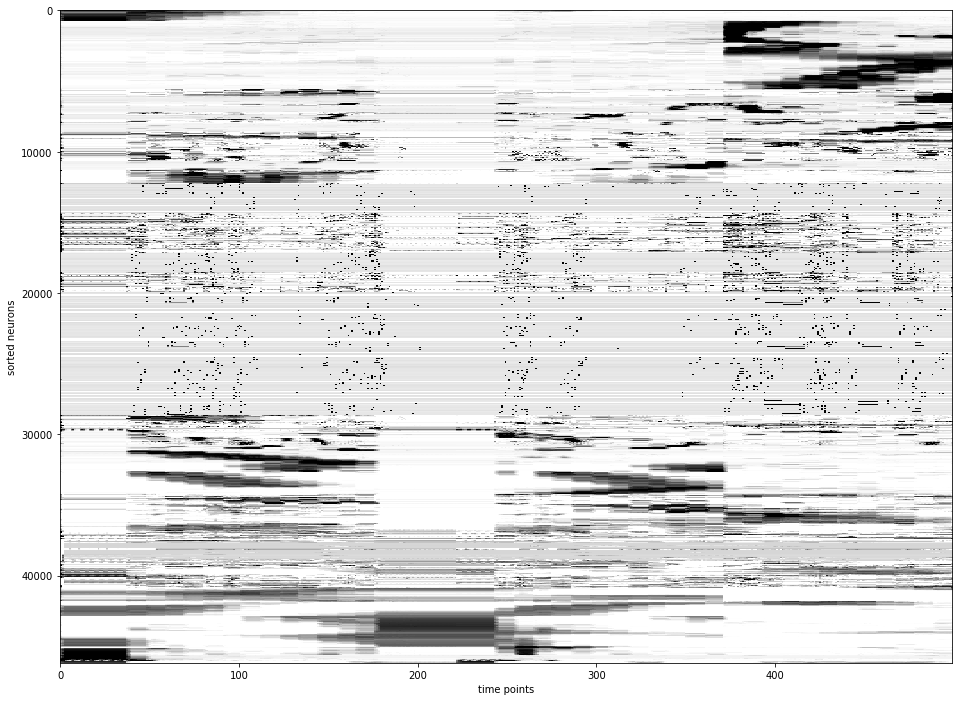

In [4]:
rm(ts_total)

# EnsemblePursuit on Layers

obtained 15 PCs in 3.2594 seconds
initialized 15 clusters with k-means in 2.3579 seconds
ensemble 0, time 2.71, nr neurons 838, EV 0.4221
ensemble 14, time 33.19, nr neurons 650, EV 0.6113
average sparsity is 0.0379
(993, 15)


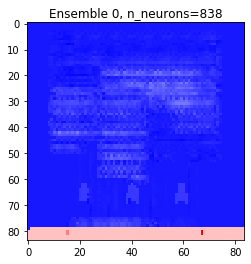

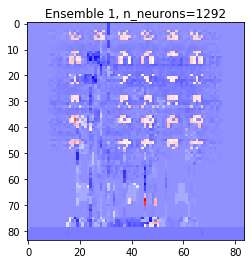

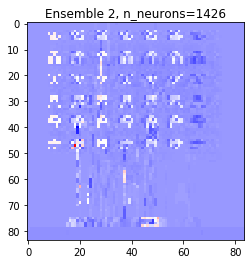

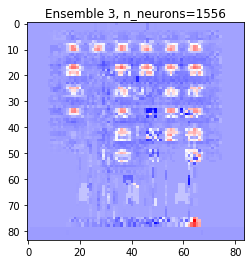

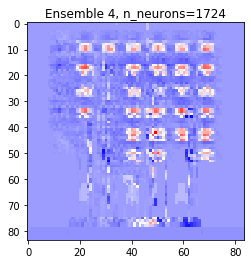

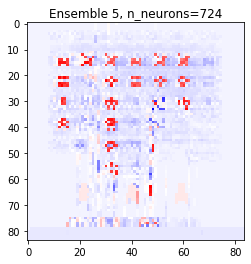

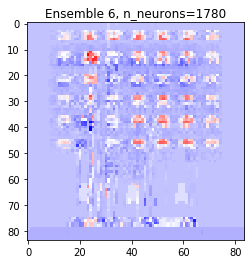

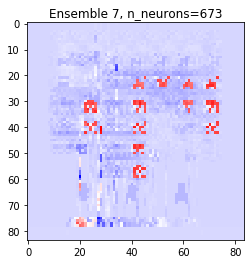

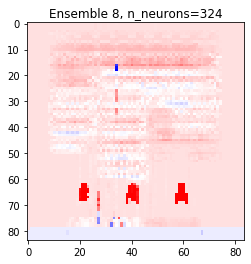

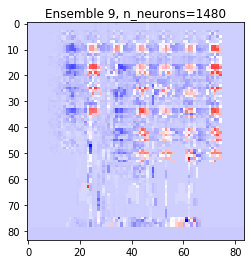

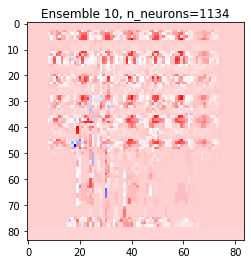

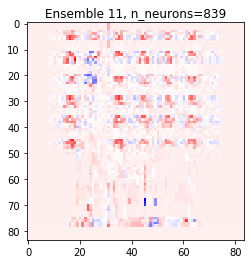

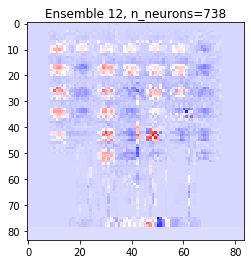

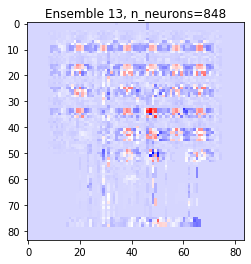

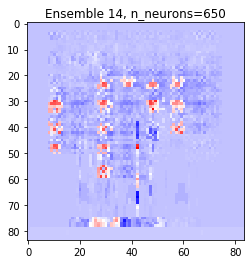

In [7]:
#Layer 1
receptive_fields_of_ind_layers(ts_l1,im_arr)

obtained 15 PCs in 1.7565 seconds
initialized 15 clusters with k-means in 1.1576 seconds
ensemble 0, time 1.88, nr neurons 2137, EV 0.1848
ensemble 14, time 12.95, nr neurons 401, EV 0.4059
average sparsity is 0.0657
(993, 15)


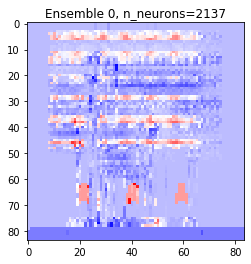

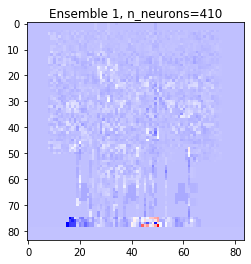

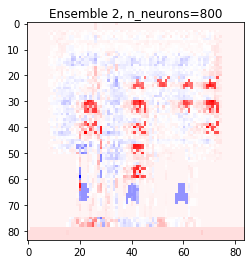

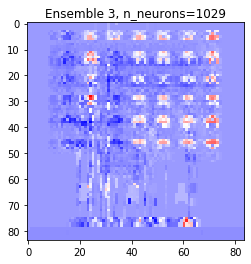

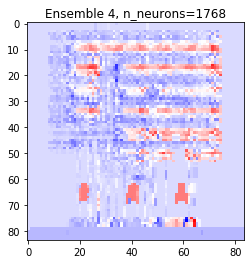

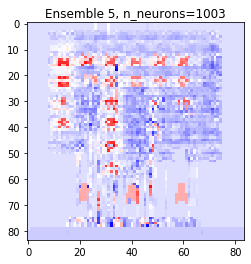

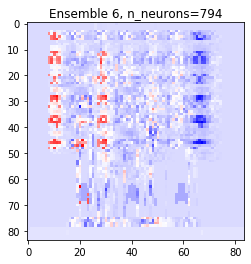

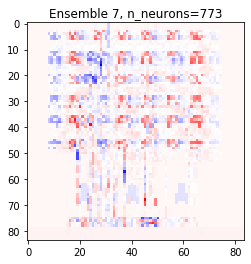

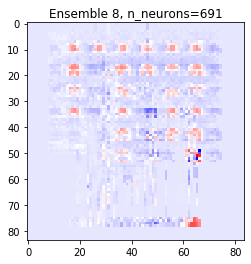

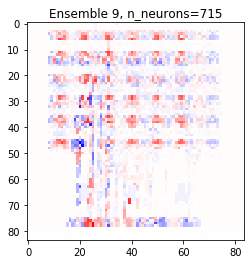

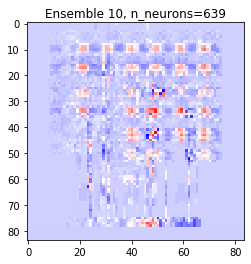

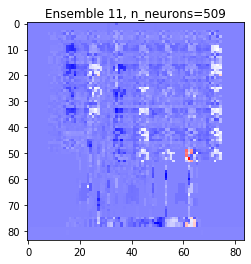

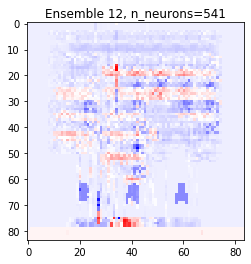

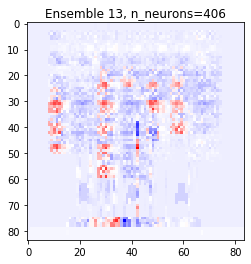

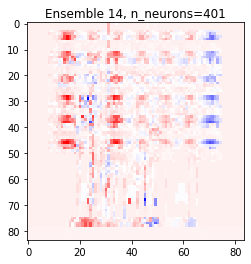

In [8]:
#Layer 2
receptive_fields_of_ind_layers(ts_l2,im_arr)

obtained 15 PCs in 1.1278 seconds
initialized 15 clusters with k-means in 0.7696 seconds
ensemble 0, time 0.79, nr neurons 1035, EV 0.0638
ensemble 14, time 5.96, nr neurons 223, EV 0.3613
average sparsity is 0.0910
(993, 15)


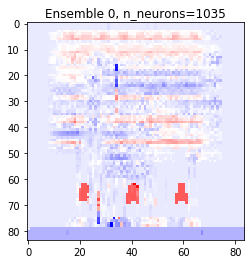

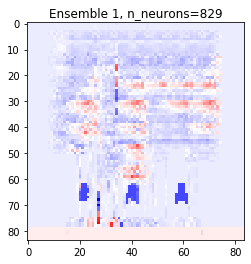

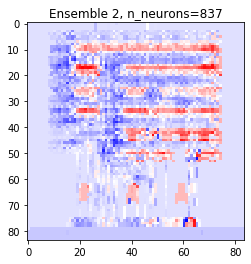

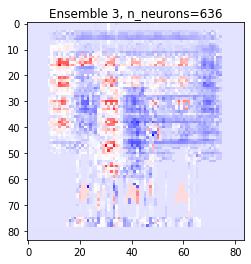

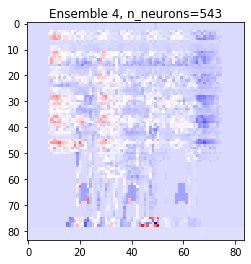

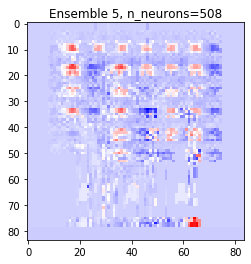

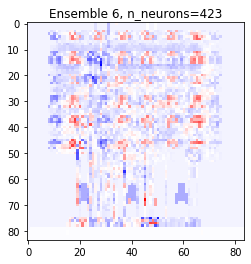

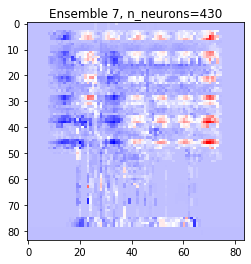

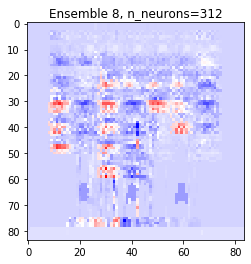

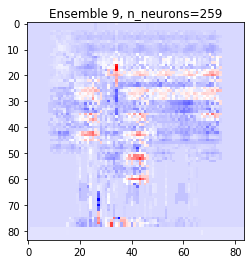

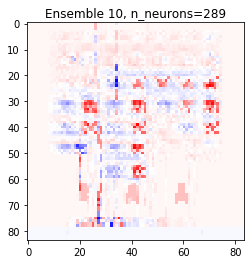

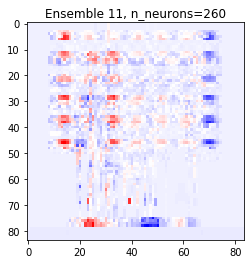

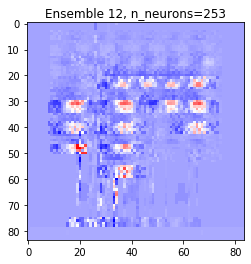

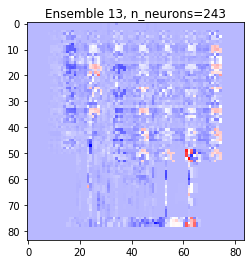

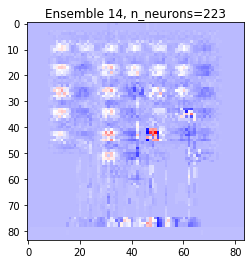

In [14]:
#Layer 2
receptive_fields_of_ind_layers(ts_l3,im_arr)

# PCA on Layers

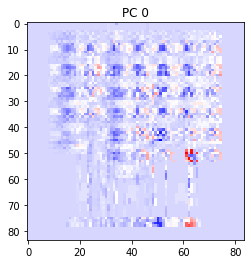

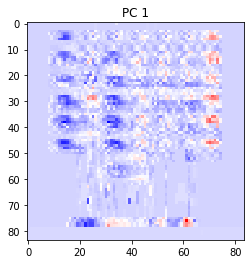

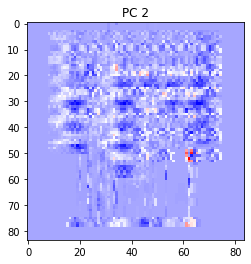

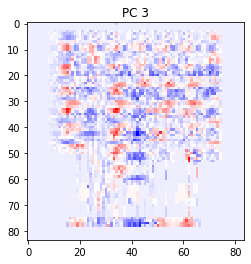

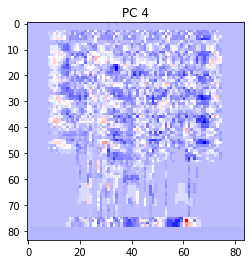

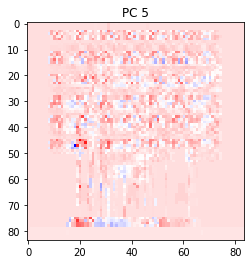

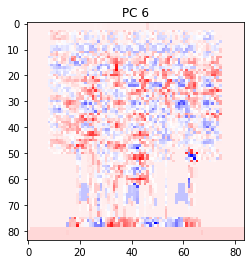

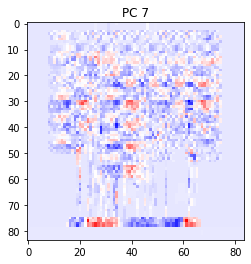

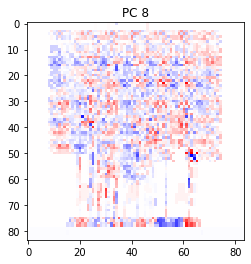

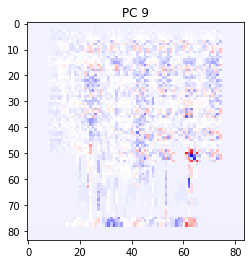

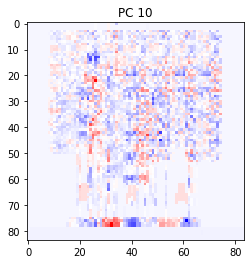

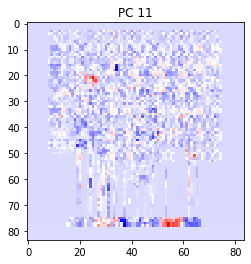

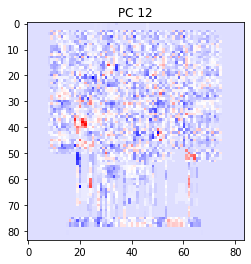

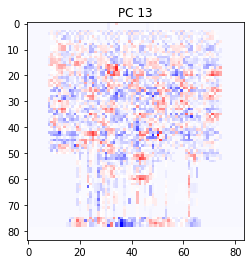

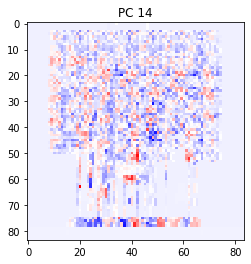

In [3]:
pca_receptive_fields_of_ind_layers(ts_l1,im_arr)

# NMF on Layers

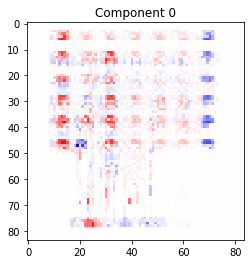

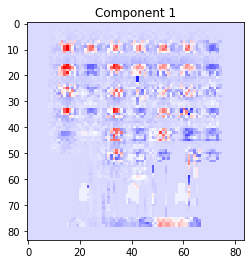

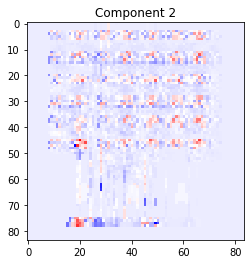

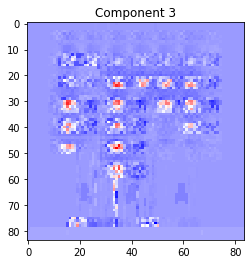

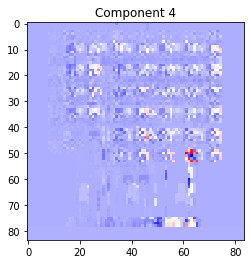

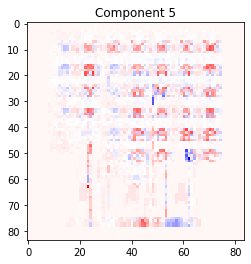

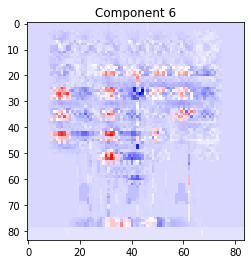

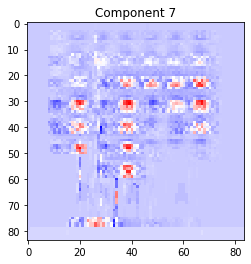

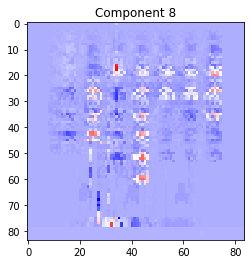

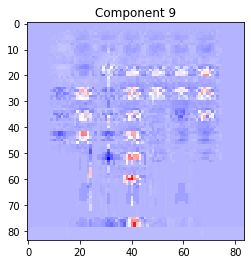

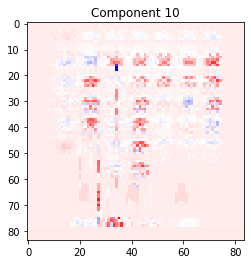

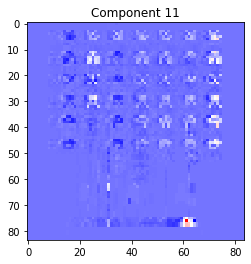

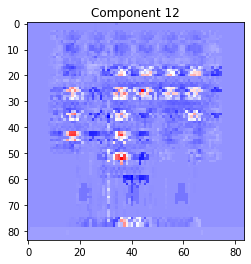

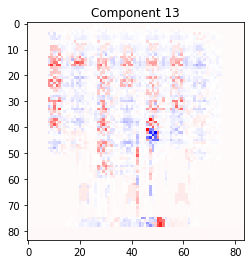

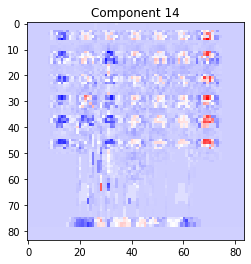

In [5]:
nmf_receptive_fields_of_ind_layers(ts_l1.clip(min=0),im_arr)

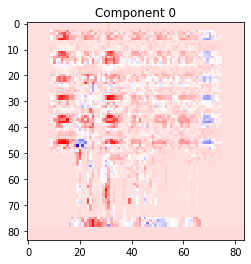

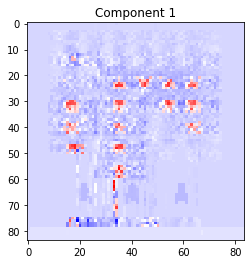

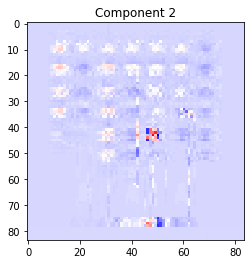

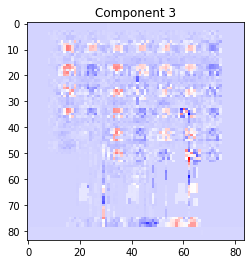

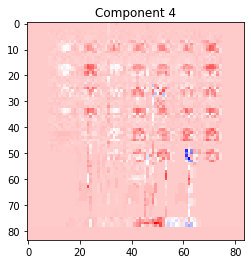

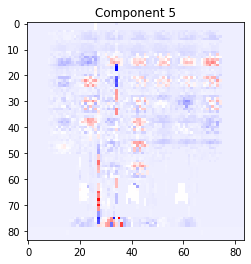

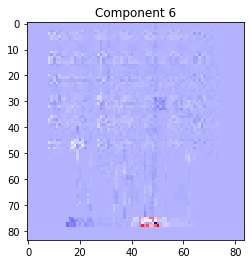

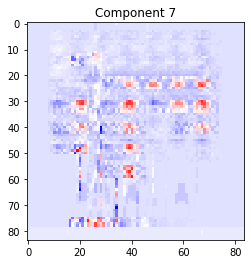

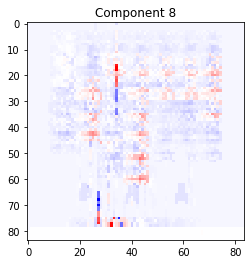

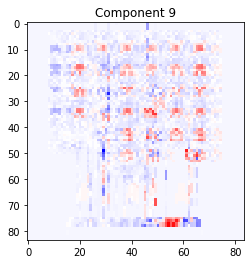

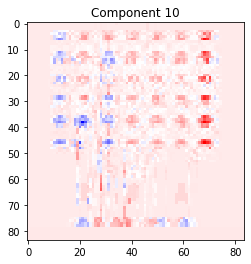

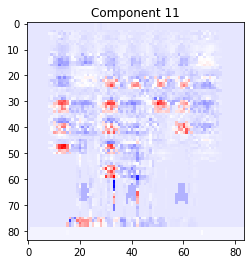

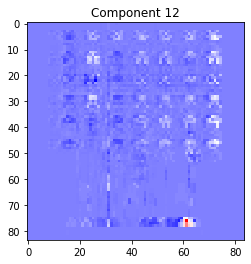

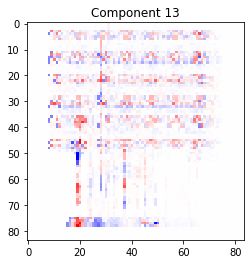

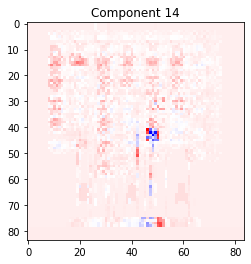

In [6]:
nmf_receptive_fields_of_ind_layers(ts_l2.clip(min=0),im_arr)

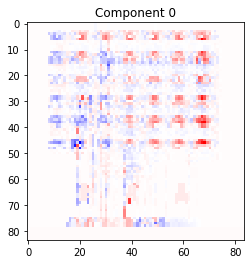

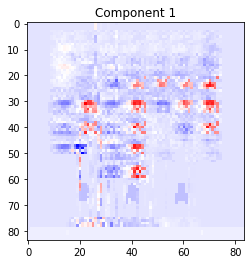

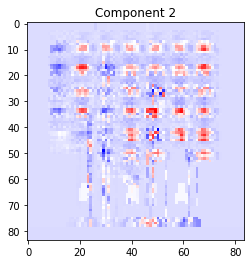

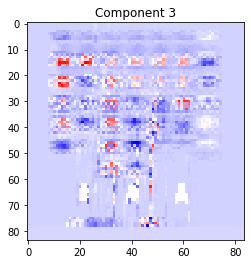

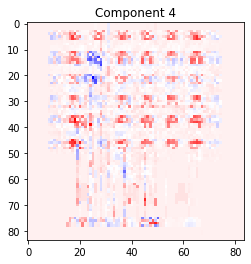

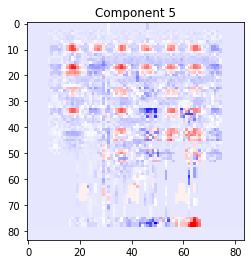

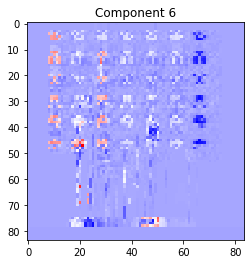

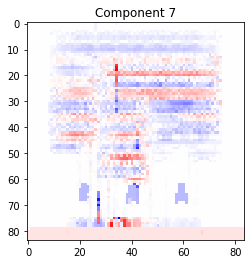

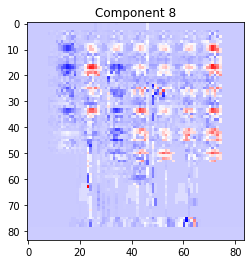

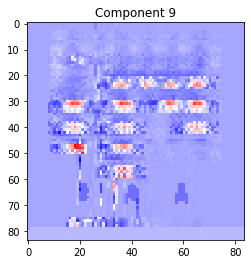

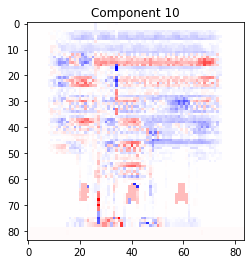

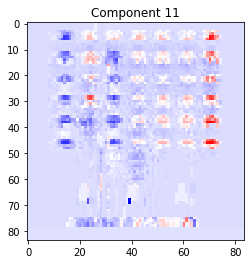

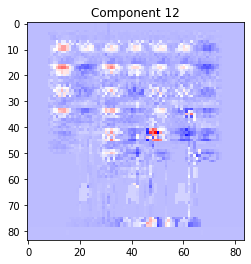

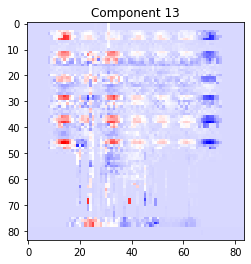

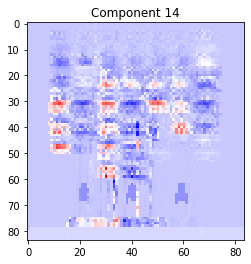

In [7]:
nmf_receptive_fields_of_ind_layers(ts_l3.clip(min=0),im_arr)

# tsne

In [51]:
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
from sklearn.decomposition import NMF, PCA
comps=NMF(n_components=15).fit_transform(ts_l3.clip(min=0))
pcs=PCA(n_components=15).fit_transform(ts_l3)
ep=EnsemblePursuit(n_components=15,n_kmeans=15,lam=0.1)
ep.fit(ts_l3)
V=ep.components_

obtained 15 PCs in 0.7082 seconds
initialized 15 clusters with k-means in 0.7428 seconds
ensemble 0, time 0.09, nr neurons 15, EV 0.0087
ensemble 14, time 1.30, nr neurons 8, EV 0.1171
average sparsity is 0.0125


In [21]:
print(V.shape)
print(pcs.shape)

(5184, 15)
(5184, 15)


In [52]:
tot_decomp=np.vstack((comps.T,pcs.T))
tot_decomp=np.vstack((tot_decomp,V.T))

In [53]:
labels=np.array([[0]*15,[1]*15,[2]*15]).flatten

In [54]:
from sklearn.manifold import TSNE,MDS
tsne=TSNE(n_components=2).fit_transform(tot_decomp)
print(tsne.shape)

(45, 2)


In [30]:
print(tot_decomp.shape)

(45, 5184)


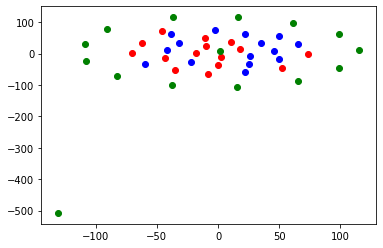

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
colors = {0:'red', 1:'green', 2:'blue'}
plt.scatter(tsne[:15,0],tsne[:15,1],c='red')
plt.scatter(tsne[15:30,0],tsne[15:30,1],c='green')
plt.scatter(tsne[30:,0],tsne[30:90,1],c='blue')
plt.show()